        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington

<h1 align='center' style="color: blue;">Assignment #4</h1>

<b>Question #1</b>: Use the <b>Health_care.csv</b> file. This file consists of a labeled dataset of 10,000 users in Twitter. Descriptions are captured from profile of users and labeled are assigned to them based on the profession (1= healthcare professional, 0= Non-healthcare professional)
<ol>
    <li>Use a representative image to form a wordcloud using the healthcare professional users' descriptions</li>
    <li>Create the document term frequency matrix (X) using CountVectorizer</li>
    <li>Use multinomial NB to form a predictive model and test the accuracy of your model</li>
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li><b>hc_related</b> is your dependent variable</li>
    </ul>
    <li>Use Random Forest to form a predictive model and test the accuracy of your model</li>
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li><b>hc_related</b> is your dependent variable</li>
    </ul>
    <li>Use Stochastic Gradient Descent to form a predictive model and test the accuracy of your model</li>
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li><b>hc_related</b> is your dependent variable</li>
    </ul>
    <li>Use logistic regression to form a predictive model and test the accuracy of your model</li>
    <ul>
            <li>Use 10-fold cross validation to test the performace of your model</li>
            <li><b>hc_related</b> is your dependent variable</li>
    </ul>
    <li>Use LDA to find 5 topics in description of health professional users</li>
    <li>Use the 5 detected topics in the last step and apply the logistic regression to develope a predictive model. Check the performance the model using the accuracy metric.
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li><b>hc_related</b> is your dependent variable</li>
    </ul>
    <li>Use word-embedding method to develope a prredictive model. Use logistic regression in your work.
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li><b>hc_related</b> is your dependent variable</li>
    </ul>
        
<ol>

In [4]:
# Write your answer here (part1)
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
stop = stopwords.words('english')

data = pd.read_csv("Health_care.csv")
data = data.dropna()
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

fil = data["hc_related"] == 1

final_data = data.description[fil]


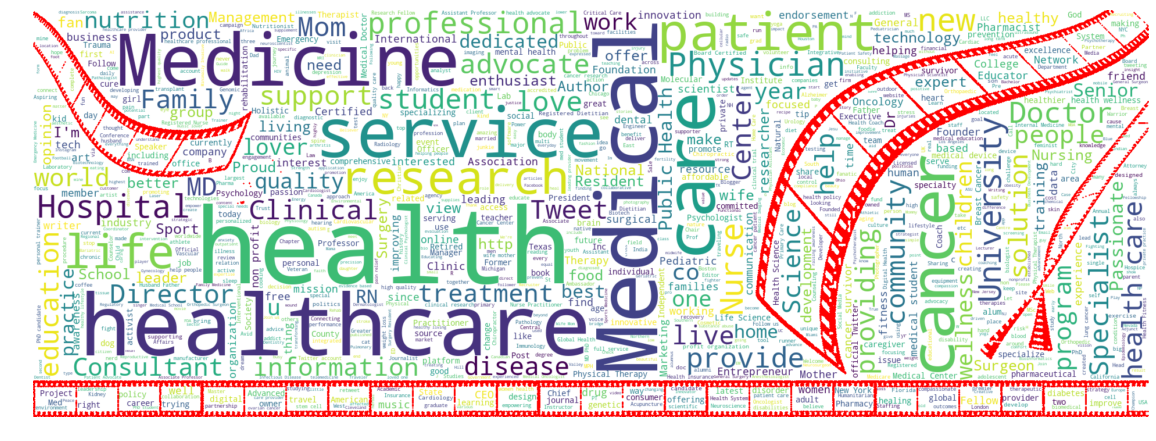

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

mask = np.array(Image.open("Movies.jpg"))

transformed_mask = np.ndarray((mask.shape[0], mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))
    
text = " ".join(story for story in final_data)


wc = WordCloud(background_color="white", max_words=1000, stopwords= stop,
               mask=transformed_mask, contour_width=3, 
               contour_color='red')
wc.generate(text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

In [2]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [60]:
# Write your answer here (part2)

from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
vect = CountVectorizer(ngram_range=(1,3),stop_words='english')
vect.fit(data.description)
X = vect.transform(data.description)       
y = data.hc_related
y=y.astype('int')                             

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
# Write your answer here (part3)

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
print("Accuracy for MultinomialNB: {}".format(round(accuracy_score(y_test,y_test_hat) * 100,2)))
print(classification_report(y_test,y_test_hat))

Accuracy for MultinomialNB: 86.4
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1858
           1       0.77      0.92      0.84      1142

   micro avg       0.86      0.86      0.86      3000
   macro avg       0.86      0.87      0.86      3000
weighted avg       0.88      0.86      0.87      3000



In [62]:
# Write your answer here (part4)

from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [63]:
y_test_hat  = model.predict(X_test)
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
print(out_of_sample_acc)

90.46666666666667


In [64]:
# Write your answer here (part5)

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = SGDClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
print("Accuracy for SGDClassifier: {}".format(round(accuracy_score(y_test,y_test_hat) * 100,2)))
print(classification_report(y_test,y_test_hat))

Accuracy for SGDClassifier: 90.33
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1858
           1       0.93      0.80      0.86      1142

   micro avg       0.90      0.90      0.90      3000
   macro avg       0.91      0.88      0.89      3000
weighted avg       0.91      0.90      0.90      3000



C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [84]:
# Write your answer here (part6)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = LogisticRegression(max_iter=300)

scores = cross_val_score(model, X, y, cv=10)
print("the 10 cross validation scores are:",scores*100)

C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


the 10 cross validation scores are: [90.10989011 90.2        88.4        90.5        89.1        89.1
 86.1        89.1        88.1        86.08608609]


In [80]:
# Write your answer here (part7)
from sklearn.feature_extraction.text import TfidfVectorizer
from html import unescape

def my_preprocessor(doc):
    return(unescape(doc).lower())

vect = TfidfVectorizer(ngram_range=(1,3),max_features=10000, max_df=.60,stop_words="english", preprocessor=my_preprocessor)
vect.fit(data.description)
X = vect.transform(data.description)

n_topics = 5 
lda = LatentDirichletAllocation(n_components= n_topics, learning_method="batch", max_iter=30, random_state=0) #LDA
document_topics = lda.fit_transform(X)

n = 10
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
topic_names = dict()

for idx, component in enumerate(lda.components_): 
    top_n_indices = component.argsort()[:-(n + 1): -1] 
    topic_tokens = [feature_names[i] for i in top_n_indices] 
    topic_names[idx] = topic_tokens

topic_names1 = ["{:>2} ".format(i) + " ".join(words) 
               for i, words in enumerate(feature_names[sorting[:, :2]])] 

print('The 5 topics for the description of health professional users using LDA are:\n')
print (topic_names1 )

The 5 topics for the description of health professional users using LDA are:

[' 0 love life', ' 1 la en', ' 2 health cancer', ' 3 ceo new', ' 4 health care']


In [81]:
# Write your answer here (part8)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=300)
X_train, X_test, y_train, y_test = train_test_split(document_topics, y, 
                                                    test_size=0.3, 
                                                    random_state=0, stratify = y)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat) * 100,2)

C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


68.9

In [41]:
# Write your answer here (part9)

from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm

text, y = data.description, data.hc_related


#nltk.download('stopwords')

embeddings = []
for desc in tqdm(text):
    
    base_embedding = np.zeros((50,))
    word_count = 0
    for token in word_tokenize(desc):
        token = token.lower()
        if token in stopwords.words('english'):
            continue
        try:
            base_embedding += embeddings_index[token]
            word_count +=1
        except:
            continue
    base_embedding = base_embedding/word_count
    embeddings.append(base_embedding)
    
X = np.array(embeddings)
X.shape
edited=np.nan_to_num(X)

y=data.hc_related
X_train, X_test, y_train, y_test = train_test_split(edited, y,test_size=0.3,random_state=0)
LR = LogisticRegression(max_iter=300)
LR.fit(X_train, y_train)
y_test_hat = LR.predict(X_test)
print("Accuracy of the model with word embedding is:",round(accuracy_score(y_test,y_test_hat) * 100,2))

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:35<00:00, 104.17it/s]
C:\Users\Amar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of the model with word embedding is: 61.93


<b>Question #2</b>: Use the <b>game_of_thrones.csv</b> file. The file contains network data for character relationships within George R. R. Martin's A Storm of Swords, the third novel in his series A Song of Ice and Fire (also known as the HBO television adaptation Game of Thrones). This data was originally compiled by A. Beveridge and J. Shan, "Network of Thrones," Math Horizons Magazine , Vol. 23, No. 4 (2016), pp. 18-22.
<ol>
    <li>Visualize the network using Force Atalas 2 layout (Optional)</li>
    <li>What is the degree distribution?(plot it)</li>
    <li>What is the average network clustering value?</li>
    <li>Which character has the highest betweenness centrality?</li>
    <li>Which character has the highest eigenvector centrality?</li>
    <li>Which character has the highest pagerank value?</li>
    <li>Apply community detection using louvain algorithm and visualize the result (resolution=1)</li>
<ol>

100%|██████████| 1000/1000 [00:01<00:00, 574.46it/s]


BarnesHut Approximation  took  0.33  seconds
Repulsion forces  took  1.19  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.10  seconds


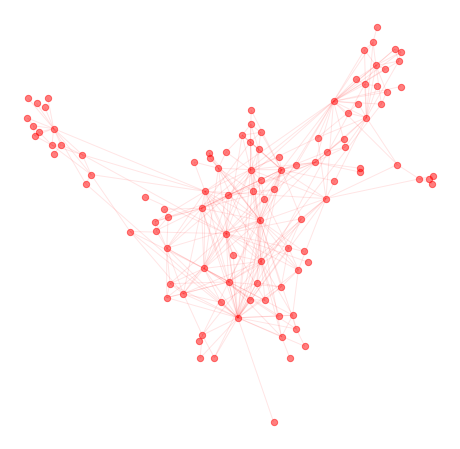

In [3]:
# Write your answer here (part1)
import networkx as nx
from fa2 import ForceAtlas2


got_data = pd.read_csv("game_of_thrones.csv") 

got_nodes = nx.from_pandas_edgelist(got_data, 'Source', 'Target', create_using=nx.Graph()) 

#using ForceAtlas2 as the layout
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=2.0,

                        # Log
                        verbose=True)

pos = forceatlas2.forceatlas2_networkx_layout(got_nodes, pos=None, iterations=1000) 

fig, ax = plt.subplots(figsize=(8,8))
nx.draw_networkx_nodes(got_nodes, pos, node_size=40, node_color="red", alpha=0.5)
nx.draw_networkx_edges(got_nodes, pos, edge_color="red", alpha=0.1) 
plt.axis('off');

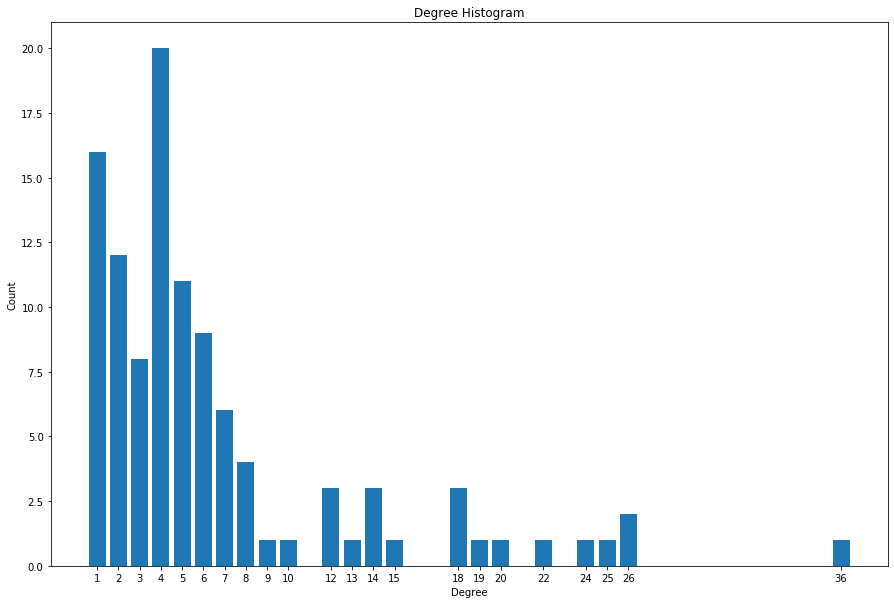

In [4]:
# Write your answer here (part2)
import matplotlib.pyplot as plt
import seaborn as sns
import collections

degree_sequence = sorted([d for n, d in got_nodes.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(15,10))
plt.bar(deg, cnt)
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg);



In [5]:
# Write your answer here (part3)

got_cluster = nx.average_clustering(got_nodes) #Calculating the average network clustering value
print("The average network clustering value is {}.".format(got_cluster))

The average network clustering value is 0.551443151559996.


In [6]:
# Write your answer here (part4)

betweenness_centrality = nx.betweenness_centrality(got_nodes)

got_node = [key for key, value in betweenness_centrality.items()]
got_cen_value = [value for key, value in betweenness_centrality.items()]

max_cen = max(got_cen_value)
for i,j in  betweenness_centrality.items():
    if max_cen == j:
        print ('{} has the highest betweenness centrality.'.format(i))
print ('The highest betweenness centrality value is {}.'.format(max_cen))

Jon has the highest betweenness centrality.
The highest betweenness centrality value is 0.22996466368473173.


In [7]:
# Write your answer here (part5)

eigenvector_centrality = nx.eigenvector_centrality(got_nodes) 

got_node1 = [key for key, value in eigenvector_centrality.items()]
got_cen_value1 = [value for key, value in eigenvector_centrality.items()]

max_cen_eig = max(got_cen_value1)
for i,j in  eigenvector_centrality.items():
    if max_cen_eig == j:
        print ('{} has the highest eigenvector centrality.'.format(i))       
print ('The highest eigenvector centrality value is {}.'.format(max_cen_eig))

Tyrion has the highest eigenvector centrality.
The highest eigenvector centrality value is 0.33663766254996313.


In [8]:
# Write your answer here (part6)

pagerank = nx.pagerank(got_nodes)

got_nodes2 = [key for key, value in pagerank.items()]
got_cen_value2 = [value for key, value in pagerank.items()]

max_cen_pr = max(got_cen_value2)


for i,j in  pagerank.items():
    if max_cen_pr == j:
        print ('{} has the highest pagerank value.'.format(i)) 
print('The highest pagerank value is {}.'.format(max_cen_pr))

Tyrion has the highest pagerank value.
The highest pagerank value is 0.04287783318840101.


In [9]:
#import sys
#!conda install --yes --prefix "{sys.prefix}" python-louvain

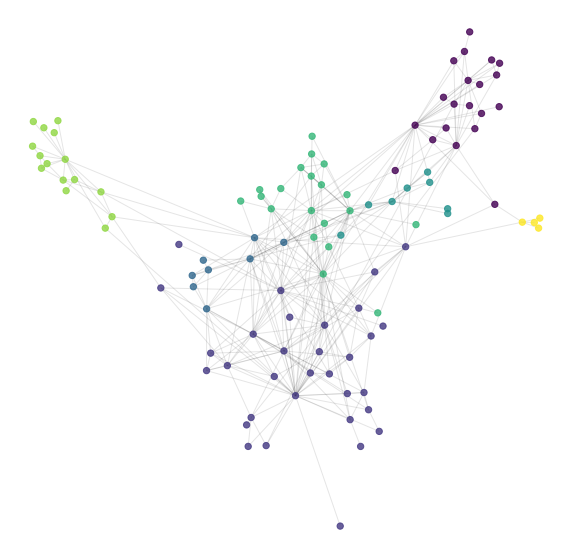

In [10]:
# Write your answer here (part7)
from community import best_partition


got_partition = best_partition(got_nodes, resolution=1)

nodes = [key for key, value in got_partition.items()]
cluster = [value for key, value in got_partition.items()]


fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx_nodes(got_nodes, pos, nodelist = nodes, node_size=40, with_labels=True, node_color=cluster, alpha=0.8)#Plotting nodes
nx.draw_networkx_edges(got_nodes, pos, edge_color="black", alpha=0.1)
plt.axis('off');

<p><b>Output</b>: 
    <ul>
        <li>You need to provide answers in the designated cell for each question (don't delete the existing comments in the cells).</li>
        <li>You need to make sure that your final file contains both codes and results (don't clear the outputs).</li>
        <li>Save your file in the .ipynb format (as it is right now).</li>
        <li>Create a zip-folder and put your file in it.</li>
        <li>Upload the zip-folder into Canvas (Assignment #4)</li>
        <li>All the assignments should be submitted by <b> Wednesday Dec 9 at 11:59 PM</b>. No late submission will be accepted</li>
        <li>I will not accept any submission by email or any other method, so make sure that you submit the file in a right place at the right time.</li>
        </ul>
</p> 